# <center> Tabular data with neural networks

### REFERENCE NOTEBOOKS
- https://github.com/fastai/fastai2/blob/master/nbs/course/lesson4-tabular.ipynb
- https://github.com/muellerzr/fastai2-Tabular-Baselines/blob/master/Tabular_fastai_Baseline.ipynb

In [1]:
# Installaton
# Estas librerías están ideadas para trabajar con imagenes, pero vamos a experimentar con datos tabulares.
!pip install fastai2 --upgrade 
!pip install torch==1.3.1

     |████████████████████████████████| 174kB 7.6MB/s 
     |████████████████████████████████| 10.2MB 12.9MB/s 
     |████████████████████████████████| 734.6MB 17kB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0


In [0]:
import pandas as pd
from fastai2.tabular.all import *

In [3]:
import fastai2
fastai2.__version__

'0.0.7'

In [4]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv

--2020-02-04 16:15:56--  https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3818789 (3.6M) [text/plain]
Saving to: ‘./../data/adult.csv’

adult.csv           100%[===================>]   3.64M  --.-KB/s    in 0.03s   

2020-02-04 16:15:56 (111 MB/s) - ‘./../data/adult.csv’ saved [3818789/3818789]



In [6]:
df = pd.read_csv("../data/adult.csv")
#df, df_test = df.iloc[:10000].copy(), df.iloc[10000:].copy()
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k


### Specifically Categorical, Continuous and Target variables

In [0]:
# La forma de acercarse a un problema de deep learning es distinto.
# Ahora vamos a hacer mucho menos preprocesado, la red neuronal se encargará de casi todo.
# fastai recomienda separar las variables categoricas, continuas y la variable a predecir.

cat_names  = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
y_names    = 'salary'

### The preprocessing

In [0]:
# Indicamos a fastai que categorice, rellene huecos y normalice todas las columnas.

procs = [Categorify, FillMissing, Normalize]

### The train-validation split

In [0]:
# 

splits = RandomSplitter()(range_of(df))
#splits = IndexSplitter(list(range(800,1000)))(range_of(df))

Now that those are defined, we can create a TabularPandas object by passing in our dataframe, the procs, our variables, what our y is, and how we want to split our data. fastai v2 is built on a Pipeline structure where first we dictate what we want to do, then we call the databunch (the high-level API is not done yet so we have nothing similar to directly DataBunching an object)

### The data: TabularPandas

In [0]:
# 
to = TabularPandas(df, procs, cat_names, cont_names, y_names="salary", splits=splits)

### The dataloader

In [11]:
dls = to.dataloaders(bs=64)
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,age_na,fnlwgt_na,education-num_na,age,fnlwgt,education-num,salary
0,State-gov,Bachelors,Married-civ-spouse,#na#,Wife,Black,False,False,False,38.000000,200904.000221,13.0,>=50k
1,Private,Some-college,Married-civ-spouse,Handlers-cleaners,Husband,White,False,False,False,27.000000,35031.996567,10.0,>=50k
2,Private,Some-college,Married-spouse-absent,Other-service,Not-in-family,White,False,False,False,50.000000,207367.000687,10.0,<50k
3,Private,Some-college,Never-married,Transport-moving,Not-in-family,Black,False,False,False,25.000000,430083.996263,10.0,<50k
4,Private,Some-college,Divorced,Adm-clerical,Unmarried,Black,False,False,False,37.000000,256723.000240,10.0,<50k
5,?,Some-college,Never-married,?,Own-child,White,False,False,False,19.000000,233778.999815,10.0,<50k
6,Self-emp-not-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,False,False,51.000000,134446.998205,9.0,<50k
7,Private,Bachelors,Never-married,Sales,Not-in-family,Asian-Pac-Islander,False,False,False,36.000000,297335.004270,13.0,<50k
8,Self-emp-not-inc,HS-grad,Widowed,Adm-clerical,Unmarried,White,False,False,False,61.000001,168654.000142,9.0,<50k
9,State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,False,False,37.000000,29145.001665,13.0,>=50k


In [12]:
# Clase que voy a predecir
dls.vocab

(#2) ['<50k','>=50k']

### Tabular learner

In [0]:
#learn = tabular_learner(dls, layers=[200,100], metrics=accuracy)
# dos capas de neuronas, una de 1000 neuronas, y otra de 500.

learn = tabular_learner(dls, layers=[1000,500], metrics=accuracy, opt_func=ranger, loss_func=CrossEntropyLossFlat())

### Find learning rate

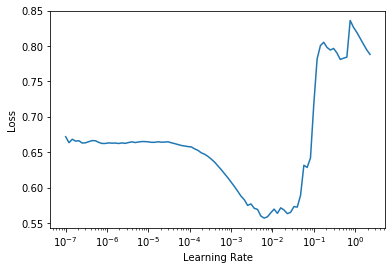

In [15]:
# 

learn.lr_find()

In [16]:
#learn.fit(1, 1e-2)
#learn.fit_one_cycle(5, 1e-2)
learn.fit_flat_cos(5, 1e-2) # entrenamos 5 epocas: vamos a darle 5 pasadas al dataset

# Hemos logrado una precisión de 83,3% mediante redes neuronales, vs el 87% de XGBoost de 2.2

epoch,train_loss,valid_loss,accuracy,time
0,0.382210,0.410787,0.813268,00:16
1,0.367339,0.367084,0.830774,00:16
2,0.363196,0.392056,0.819871,00:16
3,0.370680,0.403689,0.832310,00:16
4,0.338315,0.358895,0.833538,00:17


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

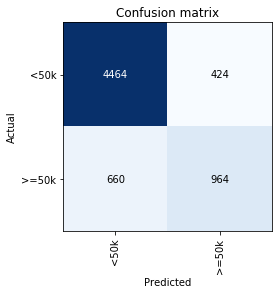

In [19]:
interp.plot_confusion_matrix()
# Tenemos bastantes fallos fuera de la diagonal.